## Preparación del entorno

In [ ]:
pip install sagemaker_datawrangler

In [2]:
import sagemaker_datawrangler           # For interactive data prep widget
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display               # For displaying outputs in the notebook
from time import gmtime, strftime                 # For labeling SageMaker models, endpoints, etc.
import sys                                        # For writing outputs to notebook
import math                                       # For ceiling function
import json                                       # For parsing hosting outputs
import os                                         # For manipulating filepath names
import sagemaker

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [21]:
import sagemaker
from sagemaker.processing import ScriptProcessor, ProcessingInput, ProcessingOutput

# Inicializa sesión y rol
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# Define tu bucket y rutas dentro de él
bucket = 'sagemakertarea2' # el nombre de tu bucket
input_s3_uri = f's3://{bucket}/input/'
output_s3_uri = f's3://{bucket}/output/'


## Cargo la data al bucket

In [22]:
import boto3

s3 = boto3.client('s3')
s3.upload_file('student-por.csv', bucket, 'input/student-por.csv')


## Importo mi script .py

In [20]:
!wget https://raw.githubusercontent.com/rafaelmartelo/mlops/refs/heads/main/tarea2/preprocessing.py --no-check-certificate

--2025-04-07 00:14:20--  https://raw.githubusercontent.com/rafaelmartelo/mlops/refs/heads/main/tarea2/preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
  Unable to locally verify the issuer's authority.
200 OKequest sent, awaiting response... 
Length: 1783 (1.7K) [text/plain]
Saving to: ‘preprocessing.py’

preprocessing.py    100%[===================>]   1.74K  --.-KB/s    in 0s      

2025-04-07 00:14:21 (33.0 MB/s) - ‘preprocessing.py’ saved [1783/1783]



## Ejecución del Processing Job en Amazon SageMaker

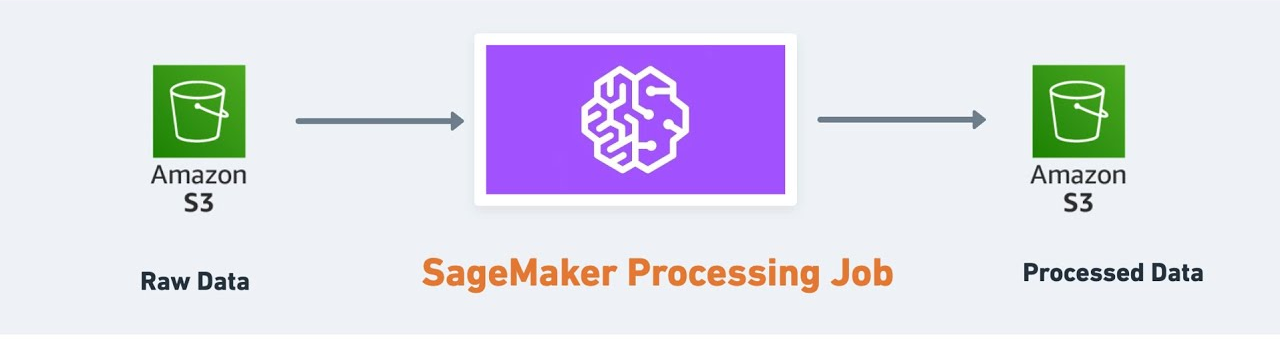

In [23]:
# ScriptProcessor define el contenedor de procesamiento
script_processor = ScriptProcessor(
    image_uri=sagemaker.image_uris.retrieve(framework='sklearn', region=sagemaker_session.boto_region_name, version='1.0-1'),
    command=['python3'],
    instance_type='ml.t3.medium',
    instance_count=1,
    base_job_name='preprocesamiento-g3',
    role=role
)

# Ejecutar job de procesamiento
script_processor.run(
    code='preprocessing.py',
    inputs=[
        ProcessingInput(source=input_s3_uri, destination='/opt/ml/processing/input')
    ],
    outputs=[
        ProcessingOutput(source='/opt/ml/processing/output', destination=output_s3_uri)
    ],
    arguments=[
        '--input', '/opt/ml/processing/input',
        '--output', '/opt/ml/processing/output'
    ]
)


.................Leyendo datos...
Columnas disponibles: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Preprocesando datos...
Guardando archivos procesados...
✅ Preprocesamiento completo.

